In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

path = "C:\\pytest\\감성대화말뭉치\\"
data = pd.read_excel(path+"감성대화말뭉치(최종데이터)_Training.xlsx")
random_state = 1111

# 연령, 감정 모델 각각 만들기
data = data[['연령', '감정_대분류', '사람문장1', '사람문장2', '사람문장3', '사람문장4']]
# data = data.fillna('')
data


,연령,감정_대분류,사람문장1,사람문장2,사람문장3,사람문장4
0,청년,기쁨,아내가 드디어 출산하게 되어서 정말 신이 나.,아 지금 정말 신이 나.,아기가 점점 클게 벌써 기대가 되네. 내가 많이 놀아줘야지.,NaN
1,노년,불안,당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야.,건강할 때 관리 좀 잘할걸 하는 생각이 들더라고.,약을 잘 챙겨 먹고 나을 수 있도록 노력해야지.,NaN
2,청소년,당황,고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워.,아직 학기 초인데 내가 수업에 잘 따라갈 수 있을지 걱정돼.,중학교 수업을 들을 때보다 훨씬 더 열심히 할 거야.,선생님이 강조하신 부분을 필기하고 집에서 매일 수업 내용을 복습하려고 해.
3,노년,기쁨,재취업이 돼서 받게 된 첫 월급으로 온 가족이 외식을 할 예정이야. 너무 행복해.,퇴직 후 다시는 돈을 못 벌 줄 알았는데 이렇게 월급으로 가족에게 맛있는 밥을 살 ...,회사생활을 열심히 해서 계속 월급을 받을거야!,NaN
4,노년,기쁨,빚을 드디어 다 갚게 되어서 이제야 안도감이 들어.,빚도 다 갚았으니 당분간은 아무 생각도 안 하며 살고 싶어.,NaN,NaN
...,...,...,...,...,...,...
40874,청년,불안,같이 사는 친구가 애완견을 데려왔는데 대부분 내가 돌보고 있어. 내가 주인인가 혼란...,나한테 아예 떠넘길 거 같은데 친구한테 얘기해볼까 고민 중이야.,이대로 내가 키우게 되면 안 되니까 확실하게 해야겠어.,친구가 자기가 데려온 강아지에 대해 책임감을 갖고 스스로 잘 돌봤으면 좋겠어.
40875,중년,기쁨,지난주에 건강검진 결과가 나왔는데 정상이라고 결과가 나왔어.,결과가 좋게 나와서 다행이야,NaN,NaN
40876,청소년,슬픔,엄마는 내 꿈인 작가를 응원해 주고는 했는데 지금은 안 그래. 너무 슬퍼.,내 재능이 남들보다 월등한 거는 아니라면서 취업해서 안정적으로 살았으면 좋겠다고 하셔.,내가 다시 내 꿈을 어떻게 이룰 것인지 자세히 설명해 드려야겠어.,NaN
40877,노년,기쁨,이렇게 좋은 운동 시설에서 경로 우대로 운동할 수 있다니 참 행운이야.,덕분에 건강도 챙길 수 있고 너무 좋아. 안마기도 있던데 내일은 운동하고 안마기도 ...,운동으로 뭉친 근육을 풀어주는 것 같아. 그럼 덜 피로하겠지.,NaN


In [2]:
data = data.rename(
    columns={'사람문장1': '사람문장', '사람문장2': '사람문장', '사람문장3': '사람문장', '사람문장4': '사람문장'})
col_data = pd.concat([data.iloc[:, [0, 1, 2]], data.iloc[:, [
                     0, 1, 3]], data.iloc[:, [0, 1, 4]], data.iloc[:, [0, 1, 5]]], axis=0)
col_data.dropna(inplace=True)
col_data = col_data.reset_index()
col_data.drop('index', axis=1, inplace=True)


In [3]:
import rhinoMorph
rn = rhinoMorph.startRhino()


def morphed(text):
    tmp_list = rhinoMorph.onlyMorph_list(
        rn, text, pos=['NNG', 'NNP', 'NP', 'VV', 'VA', 'XR', 'VCN', 'MAG', 'MAJ', 'IC']) #ef, -ic
    return ' '.join(tmp_list)


filepath:  c:\projects\venv\lib\site-packages
classpath:  c:\projects\venv\lib\site-packages\rhinoMorph/lib/rhino.jar
RHINO started!


In [4]:
col_data['사람문장_형태소'] = col_data['사람문장'].apply(morphed)


In [34]:
col_data

,연령,감정_대분류,사람문장,사람문장_형태소
0,청년,기쁨,아내가 드디어 출산하게 되어서 정말 신이 나.,아내 드디어 출산 되 정말 신 나
1,노년,불안,당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야.,당뇨 합병증 약이 가지 넘어가 스트레스
2,청소년,당황,고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워.,고등학교 올라오 중학교 때 수업 갑자기 어렵 당황
3,노년,기쁨,재취업이 돼서 받게 된 첫 월급으로 온 가족이 외식을 할 예정이야. 너무 행복해.,재취업 되 받 되 월급 오 가족 외식 하 예정 너무 행복
4,노년,기쁨,빚을 드디어 다 갚게 되어서 이제야 안도감이 들어.,빚 드디어 다 갚 되 이제야 안도감 들
...,...,...,...,...
114284,노년,불안,미리 미리 건강 챙기고 모두 안 아팠으면 좋겠어.,미리 미리 건강 챙기 모두 안 아프 좋
114285,노년,당황,주변에 믿음직한 사람들에게서 정보도 많이 얻고 달콤한 말은 항상 의심하고 볼래.,주변 믿음직 사람 정보 많이 얻 달콤 말 항상 의심 보
114286,노년,불안,친구들에게 내 마음을 터놓고 얘기하면 좀 나아질 것 같아.,친구 나 마음 터놓 이야기 좀 낫 같
114287,노년,당황,남편에게 이런 내 마음을 솔직하게 얘기해 봐야겠어.,남편 나 마음 솔직 이야기


In [5]:
from sklearn.model_selection import train_test_split
연령_X_pre, 연령_X_test, 연령_y_pre, 연령_y_test = train_test_split(
    col_data.iloc[:, -1], col_data.iloc[:, 0], random_state=random_state, test_size=.3)
연령_X_train, 연령_X_validation, 연령_y_train, 연령_y_validation = train_test_split(
    연령_X_pre, 연령_y_pre, random_state=random_state, test_size=.1)
# test 데이터는 앞에서 3000건만 취하고 나머지 버림
연령_X_test = 연령_X_test[:3000]
연령_y_test = 연령_y_test[:3000]

감정_X_pre, 감정_X_test, 감정_y_pre, 감정_y_test = train_test_split(
    col_data.iloc[:, -1], col_data.iloc[:, 1], random_state=random_state, test_size=.3)
감정_X_train, 감정_X_validation, 감정_y_train, 감정_y_validation = train_test_split(
    감정_X_pre, 감정_y_pre, random_state=random_state, test_size=.1)
# test 데이터는 앞에서 3000건만 취하고 나머지 버림
감정_X_test = 감정_X_test[:3000]
감정_y_test = 감정_y_test[:3000]


In [7]:
import numpy as np
text_len = [len(line.split()) for line in 연령_X_train]
print(f"최소길이: {np.min(text_len)}")
print(f"최대길이: {np.max(text_len)}")
print(f"평균길이: {np.round(np.mean(text_len),1)}")
print(f"중위수길이: {np.median(text_len)}")
print(f"구간별 최대 길이: {np.percentile(text_len, [0,25,75,90,95,97,98,99,100])}")
print(f"최소길이 문장: {연령_X_train.iloc[np.argmin(text_len)]}")
print(f"최대길이 문장: {연령_X_train.iloc[np.argmax(text_len)]}")


최소길이: 1
최대길이: 31
평균길이: 8.2
중위수길이: 8.0
구간별 최대 길이: [ 1.  6. 10. 12. 13. 14. 15. 17. 31.]
최소길이 문장: 갱년기
최대길이 문장: 응 직속 상사 잘못 하 일 나 떠넘기 나 말 못 하 결국 욕 먹 힘들 일 관두 이러 알 나 하 일 아니 그때 말 하 그리하 정말 후회 되


In [8]:
###
from collections import Counter

a_text_list = [line.split() for line in 연령_X_train]
b_text_len = [line.split() for line in 연령_X_validation]
c_text_len = [line.split() for line in 연령_X_test]

a_data = []
for i in a_text_list:
    for j in i:
        a_data.append(j)


In [9]:
a = Counter(a_data)

# print(f"train_data_label_freq:", a)
print(len(a))

12075


In [10]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
import numpy as np
import math

max_words=3000
maxlen=18

tokenizer=Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(a_text_list)
word_index=tokenizer.word_index

In [11]:
len([k for k in a if a[k] > 100]) # 50번 이상 나오는 단어는 1266, 100번 이상 나오는 단어는 800개

800

In [42]:
연령_X_train

70719                  아무렇 틈 나 나 머리채 쥐 괴롭히 있
15637            친구 생일 선물 예쁘 가방 다 바쁘 정말 고맙 있
103541                   응 그래도 꿈 포기 다시 한번 도전
35869                 나이 마음 들 친구 없 상황 너무나 슬프
78275       남편 아이 그렇게 생각 정말 모르 그동안 아이 관심 도 없
                         ...                
91862              나 아직 아프 더 알 솔직 마음 이야기 하 보
87866     나 능력 정확 평가 그것 반영해 연봉 잘 올리 점 가장 좋 점
21228                  출산 앞두 아내 혼자 때 일 생기 걱정
78029                     처음 작 점점 커지 같 미관 걱정
24993                   점심시간 나 항상 밥 혼자 쓸쓸 외롭
Name: 사람문장_형태소, Length: 72001, dtype: object

In [12]:
data = tokenizer.texts_to_sequences(연령_X_train)
# print("data:", data)
len_d= [len(d) for d in data]
# print("길이", len_d)
print("최대문장길이: ", max(len_d))
print("최소문장길이: ", min(len_d))

연령_X_train_data = pad_sequences(data, maxlen=maxlen)
print(연령_X_train_data[0])
print(len(연령_X_train_data[0]))

최대문장길이:  31
최소문장길이:  0
[   0    0    0    0    0    0    0    0    0    0    0    0 1546 1974
    1    1  165    7]
18


In [13]:
data = tokenizer.texts_to_sequences(연령_X_validation)
# print("data:", data)
len_d= [len(d) for d in data]
# print("길이", len_d)
print("최대문장길이: ", max(len_d))
print("최소문장길이: ", min(len_d))

연령_X_validation_data = pad_sequences(data, maxlen=maxlen)
print(연령_X_validation_data[0])
print(len(연령_X_validation_data[0]))

최대문장길이:  25
최소문장길이:  1
[   0    0    0    0    0    0    0   59 1672   16   95   74  161  247
 1419  566   75    4]
18


In [14]:
data = tokenizer.texts_to_sequences(연령_X_test)
# print("data:", data)
len_d= [len(d) for d in data]
# print("길이", len_d)
print("최대문장길이: ", max(len_d))
print("최소문장길이: ", min(len_d))

연령_X_test_data = pad_sequences(data, maxlen=maxlen)
print(연령_X_test_data[0])
print(len(연령_X_test_data[0]))

최대문장길이:  28
최소문장길이:  1
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 2280 1367 1616]
18


In [15]:
data = tokenizer.texts_to_sequences(감정_X_train)
# print("data:", data)
len_d= [len(d) for d in data]
# print("길이", len_d)
print("최대문장길이: ", max(len_d))
print("최소문장길이: ", min(len_d))

감정_X_train_data = pad_sequences(data, maxlen=maxlen)
print(감정_X_train_data[0])
print(len(감정_X_train_data[0]))

최대문장길이:  31
최소문장길이:  0
[   0    0    0    0    0    0    0    0    0    0    0    0 1546 1974
    1    1  165    7]
18


In [29]:
연령_X_test_data

array([[   0,    0,    0, ..., 2280, 1367, 1616],
       [   0,    0,    0, ...,   98,   27,   81],
       [   0,    0,    0, ...,  126,  591,  529],
       ...,
       [   0,    0,    0, ...,   89,   36,  184],
       [   0,    0,    0, ...,  464,  105,    2],
       [   0,    0,    0, ...,   23,   56,  111]])

In [30]:
감정_X_train_data

array([[   0,    0,    0, ...,    1,  165,    7],
       [   0,    0,    0, ...,   23,  189,    7],
       [   0,    0,    0, ...,  105,  294, 1061],
       ...,
       [   0,    0,    0, ...,   17,  104,   24],
       [   0,    0,    0, ..., 1096,    4,   24],
       [   0,    0,    0, ...,   75,  912,  180]])

In [16]:
data = tokenizer.texts_to_sequences(감정_X_validation)
# print("data:", data)
len_d= [len(d) for d in data]
# print("길이", len_d)
print("최대문장길이: ", max(len_d))
print("최소문장길이: ", min(len_d))

감정_X_validation_data = pad_sequences(data, maxlen=maxlen)
print(감정_X_validation_data[0])
print(len(감정_X_validation_data[0]))

최대문장길이:  25
최소문장길이:  1
[   0    0    0    0    0    0    0   59 1672   16   95   74  161  247
 1419  566   75    4]
18


In [17]:
data = tokenizer.texts_to_sequences(감정_X_test)
# print("data:", data)
len_d= [len(d) for d in data]
# print("길이", len_d)
print("최대문장길이: ", max(len_d))
print("최소문장길이: ", min(len_d))

감정_X_test_data = pad_sequences(data, maxlen=maxlen)
print(감정_X_test_data[0])
print(len(감정_X_test_data[0]))

최대문장길이:  28
최소문장길이:  1
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 2280 1367 1616]
18


In [18]:
# one hot encoding
def to_one_hot(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
        return results

In [19]:
연령_X_train_data_one_hot_encoding = to_one_hot(연령_X_train_data, dimension=max_words)
연령_X_validation_data_one_hot_encoding = to_one_hot(연령_X_validation_data, dimension=max_words)
연령_X_test_data_one_hot_encoding = to_one_hot(연령_X_test_data, dimension=max_words)
감정_X_train_data_one_hot_encoding = to_one_hot(감정_X_train_data, dimension=max_words)
감정_X_validation_data_one_hot_encoding = to_one_hot(감정_X_validation_data, dimension=max_words)
감정_X_test_data_one_hot_encoding = to_one_hot(감정_X_test_data, dimension=max_words)


(72001, 3000)

In [20]:
# 연령_y_train
# 연령_y_validation
# 연령_y_test
# 감정_y_train
# 감정_y_validation
# 감정_y_test


In [21]:
# one hot encoding
def to_one_hot(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences.values):
        results[i, sequence] = 1.
    return results

In [31]:
empty_dict = dict()
연령_y_train_one_hot_encoding = 연령_y_train.copy()
연령_y_validation_one_hot_encoding = 연령_y_validation.copy()
연령_y_test_one_hot_encoding = 연령_y_test.copy()
for idx, v in enumerate(연령_y_train.unique()):
    empty_dict[v] = idx
print(empty_dict)
for i in empty_dict:
    연령_y_train_one_hot_encoding = 연령_y_train_one_hot_encoding.replace(i, empty_dict[i])
    연령_y_validation_one_hot_encoding = 연령_y_validation_one_hot_encoding.replace(i, empty_dict[i])
    연령_y_test_one_hot_encoding = 연령_y_test_one_hot_encoding.replace(i, empty_dict[i])


{'청소년': 0, '청년': 1, '중년': 2, '노년': 3}


In [33]:
연령_y_train

70719     청소년
15637      청년
103541     중년
35869      노년
78275      중년
         ... 
91862      노년
87866      중년
21228      청년
78029      중년
24993     청소년
Name: 연령, Length: 72001, dtype: object

In [32]:
연령_y_train_one_hot_encoding

70719     0
15637     1
103541    2
35869     3
78275     2
         ..
91862     3
87866     2
21228     1
78029     2
24993     0
Name: 연령, Length: 72001, dtype: int64

In [48]:
연령_y_train_one_hot_encoding = to_one_hot(연령_y_train_one_hot_encoding, dimension=4)
연령_y_validation_one_hot_encoding = to_one_hot(연령_y_validation_one_hot_encoding, dimension=4)
연령_y_test_one_hot_encoding = to_one_hot(연령_y_test_one_hot_encoding, dimension=4)


In [49]:
연령_y_train_one_hot_encoding

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]])

In [24]:
empty_dict = dict()
감정_y_train_one_hot_encoding = 감정_y_train.copy()
감정_y_validation_one_hot_encoding = 감정_y_validation.copy()
감정_y_test_one_hot_encoding = 감정_y_test.copy()
for idx, v in enumerate(감정_y_train.unique()):
    empty_dict[v] = idx
print(empty_dict)
for i in empty_dict:
    감정_y_train_one_hot_encoding = 감정_y_train_one_hot_encoding.replace(i, empty_dict[i])
    감정_y_validation_one_hot_encoding = 감정_y_validation_one_hot_encoding.replace(i, empty_dict[i])
    감정_y_test_one_hot_encoding = 감정_y_test_one_hot_encoding.replace(i, empty_dict[i])
    


{'분노': 0, '기쁨': 1, '슬픔': 2, '당황': 3, '상처': 4, '불안': 5, '기쁨 ': 6, '불안 ': 7}


In [25]:
감정_y_train_one_hot_encoding = to_one_hot(감정_y_train_one_hot_encoding, dimension=len(empty_dict))
감정_y_validation_one_hot_encoding = to_one_hot(감정_y_validation_one_hot_encoding, dimension=len(empty_dict))
감정_y_test_one_hot_encoding = to_one_hot(감정_y_test_one_hot_encoding, dimension=len(empty_dict))


In [26]:
epochs = 20
batch_size= 1
model_name= 'c:\\projects\\model\\221012\\train_data_morphed.h5'
tokenizer_name= 'c:\\projects\\model\\221012\\train_data_morphed.pickle'

from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(연령_X_train_data_one_hot_encoding.shape[1],)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=연령_y_train_one_hot_encoding.shape[1], activation='softmax'))
model.summary()

model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics='acc')

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
earlystop_callback = EarlyStopping(monitor='val_loss', patience=5)
cp_callback = ModelCheckpoint(filepath=model_name, monitor='val_loss', verbose=1, save_best_only=True)
history = model.fit(연령_X_train_data_one_hot_encoding, 연령_y_train_one_hot_encoding, epochs=epochs, batch_size=batch_size, validation_data=(연령_X_validation_data_one_hot_encoding, 연령_y_validation_one_hot_encoding), callbacks=[earlystop_callback, cp_callback], verbose=1)
history_dict = history.history


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192064    
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
Total params: 194,276
Trainable params: 194,276
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
58021/72001 [=======================>......] - ETA: 1:17 - loss: 1.3714 - acc: 0.3051

KeyboardInterrupt: 

In [273]:
epochs = 20
batch_size= 32
model_name= 'c:\\projects\\model\\221012\\train_data_morphed_2.h5'
tokenizer_name= 'c:\\projects\\model\\221012\\train_data_morphed_2.pickle'

from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(감정_X_train_data_one_hot_encoding.shape[1],)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=감정_y_train_one_hot_encoding.shape[1], activation='softmax'))
model.summary()

model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics='acc')

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
earlystop_callback = EarlyStopping(monitor='val_loss', patience=5)
cp_callback = ModelCheckpoint(filepath=model_name, monitor='val_loss', verbose=1, save_best_only=True)
history = model.fit(감정_X_train_data_one_hot_encoding, 감정_y_train_one_hot_encoding, epochs=epochs, batch_size=batch_size, validation_data=(감정_X_validation_data_one_hot_encoding, 감정_y_validation_one_hot_encoding), callbacks=[earlystop_callback, cp_callback], verbose=1)
history_dict = history.history


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 64)                64064     
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 8)                 264       
                                                                 
Total params: 66,408
Trainable params: 66,408
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
2249/2251 [============================>.] - ETA: 0s - loss: 1.8112 - acc: 0.1738
Epoch 1: val_loss improved from inf to 1.79264, saving model to c:\projects\model\221012\train_data_morphed_2.h5
2251/2251 [==============================] - 12s 5ms/step - loss: 1.8112 - acc: 0.1738 - val_loss: 1.7926 - 

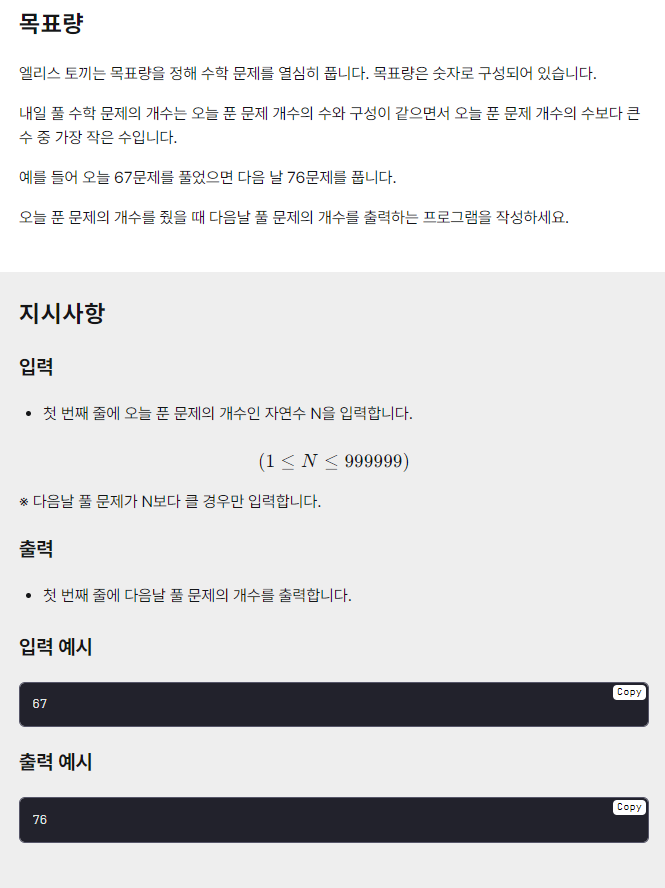

In [14]:
import itertools
n=input()
p=list(map(''.join, sorted(list(itertools.permutations(n,len(n))))))
try:
    print(p[p.index(n)+1])
except:
    print(n+str(0))

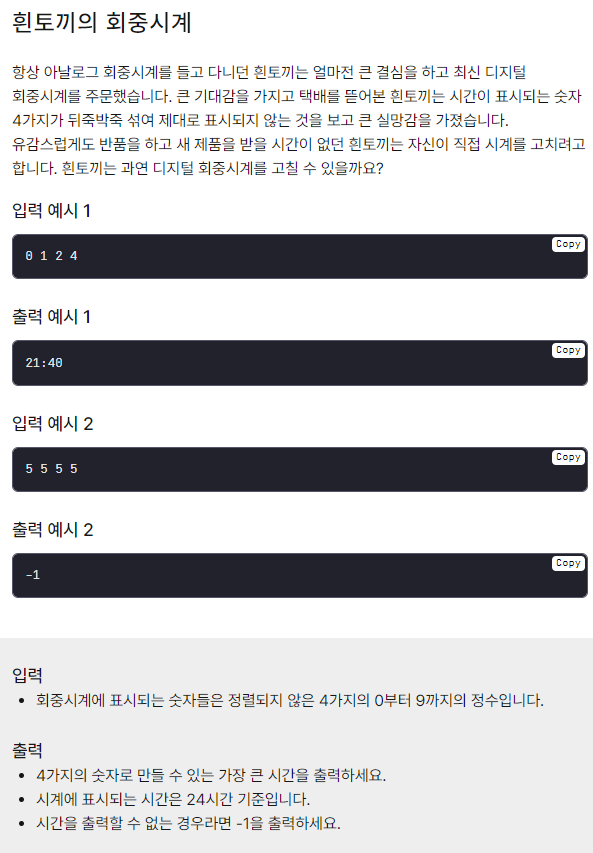

In [14]:
num_list = [1,2,3,4]
num_list = [0,1,2,3]
num_list = [5,5,5,5]
num_list = [0,1,8,9]
# num_list = list(map(int, input().split()))

time = []
if 2 in num_list:
    time.append(2)
    num_list.pop(num_list.index(2))
    for i in range(3, -1, -1):
        if i in num_list:
            time.append(i)
            num_list.pop(num_list.index(i))
            time.append(''.join(sorted(map(str,num_list), reverse=True)))
            break
elif 1 in num_list:
    time.append(1)
    num_list.pop(num_list.index(1))

elif 0 in num_list:
    pass
else:
    print(-1)
    exit(0)


print(f"{''.join(map(str,time))[:2]}:{''.join(map(str,time))[2:]}")


1:


In [31]:
import itertools

num_list = [1,2,3,4]
num_list = [0,1,2,3]
num_list = [5,5,5,5]
num_list = [0,1,8,9]
# num_list = list(map(int, input().split()))

p=list(map(''.join, map(str,list(itertools.permutations(num_list,4)))))
for i in p:
    h=int(i[1]+i[4])
    m=int(i[7]+i[10])
    for j in range(23,-1,-1):
        if j==h:
            print(j)
            exit(0)


1
1
8
8
9
9
10
10
18
18
19
19


In [ ]:
# import itertools
# n=input()
# p=list(map(''.join, sorted(list(itertools.permutations(n,len(n))))))
# try:
#     print(p[p.index(n)+1])
# except:
#     print(n[0]+str(0)+n[1:])

s = list(input())
for i in range(len(s)-2, -1, -1):
    if s[i] < s[i+1]: break
else:
    print(0)
    exit()
for j in range(len(s)-1, i, -1):
    if s[j] > s[i]: break
s[i], s[j] = s[j], s[i]
s[i+1:] = s[:i:-1]
print(''.join(s))

In [ ]:
import itertools
num_list = list(map(int, input().split()))
p=list(map(''.join, map(str,list(itertools.permutations(num_list,4)))))
hour=[]
for i in p:
    h=int(i[1]+i[4])
    if h<=23:
        hour.append(h)
for j in sorted(set(hour),reverse=True):
    temp_list = num_list.copy()
    if len(str(j))==1:
        temp_list.pop(temp_list.index(0))
        temp_list.pop(temp_list.index(j))
    else:
        temp_list.pop(temp_list.index(int(str(j)[0])))
        temp_list.pop(temp_list.index(int(str(j)[1])))
    tmp_min = []
    if temp_list[0]*10+temp_list[1] <= 60:
        tmp_min.append(temp_list[0]*10+temp_list[1])
    if temp_list[0]+temp_list[1]*10 <= 60:
        tmp_min.append(temp_list[0]+temp_list[1]*10)
    if len(tmp_min)==0:
        continue
    min = max(tmp_min)
    print(f"{j:02d}:{min:02d}")
    break
else:
    print(-1)

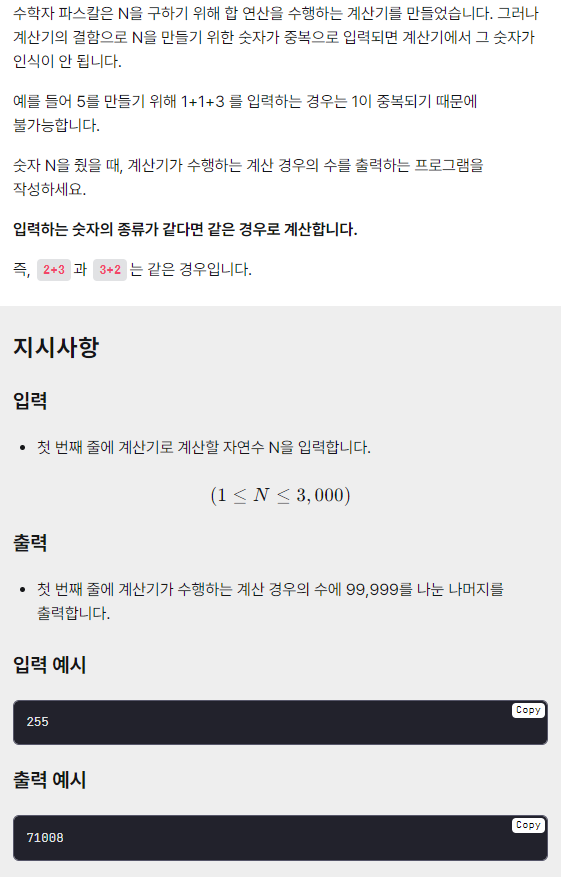

In [ ]:
2^5 7 317 =71008
255
254=2*127ㅜ

1 2 252
1->127
2 3



In [37]:
n=int(input())
num=[]
x=[]

def sum_list(i, x, n):
    if i>=n:
        return 0
    if i not in x:
        x.append(i)
        if sum(x)!=n:
            sum_list(i+1, x, n)
        elif sum(x)==n:
            num.append(x)
        elif sum(x)>n:
            pass


sum_list(1, [], n)

print(len(num))

0


In [42]:
# import sys
# input=sys.stdin.readline
n=int(input())
for k in range(1, int((n*10)**0.5)+1):
    p = [[0]*(n+1) for _ in range(k+1)]
    for i in range(1, n+1):
        p[1][i] = 1
    for i in range(1, k+1):
        p[i][1] = i
    for i in range(2, k+1):
        for j in range(2, n+1):
            p[i][j] = (p[i][j-1]+p[i-1][j]) % 99999
print(p[k][n] % 99999)


In [ ]:
import sys
num, count = map(int,sys.stdin.readline().split())

#count는 n차원, num은 열의 개수
dp = [[0 for i in range(num+1)] for j in range(count)]

#초기화
for i in range(0,len(dp)):
    for j in range(num+1):
        if i == 0:
            dp[i][j] = 1
        else:
            dp[i][0] = 1

for i in range(1,len(dp)):
    for j in range(1,num+1):
        dp[i][j] = sum(dp[i-1][:j+1])

print(max(dp[count-1]) % 1000000000)

In [1]:
# import sys
# input=sys.stdin.readline
n=int(input())
for k in range(1, int((n*10)**0.5)+1):
    p = [[0]*(n+1) for _ in range(k+1)]
    for i in range(1, n+1):
        p[1][i] = 1
    for i in range(1, k+1):
        p[i][1] = i
    for i in range(2, k+1):
        for j in range(2, n+1):
            p[i][j] = (p[i][j-1]+p[i-1][j]) % 99999
    print(p[k][n] % 99999)


1
255
32640
96187
54123
43599
89308
15660
12870
64982
95541
28965
25397
44697
98493
46325
19242
24390
13008
65853
12195
73983
46341
14634
86178
9756
51219
10840
52032
28455
36043
89430
61788
88888
0
0
11111
33333
66666
44444
66666
99186
3794
63414
65853
30894
53658
58536
1626
36585


In [2]:
[[0]*(10+1) for _ in range(3+1)]

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [3]:
int((255*10)**0.5)+1

51